In [2]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
marketing_df = pd.read_csv('../2. data_after_txt_proc/bank_marketing_data_after_txt_proc.csv')
personal_df = pd.read_csv('../2. data_after_txt_proc/Bank_Personal_Loan_Modelling_after_txt_proc.csv')

# marketing_df

In [4]:
X_m, y_m = marketing_df.drop(columns='deposit'), marketing_df.deposit

In [5]:
feature_names_m = X_m.columns.tolist()

In [6]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

In [9]:
def objective_m(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1500, 25)
    max_depth = trial.suggest_int('max_depth', 2, 20, 2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model_m = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    score = cross_val_score(model_m, X_train_m, y_train_m, cv=5, scoring='accuracy').mean()
    return score

In [10]:
study_m = optuna.create_study(direction='maximize')
study_m.optimize(objective_m, n_trials=50)

[I 2024-12-02 20:40:10,598] A new study created in memory with name: no-name-47d050dc-0133-4813-8216-341745acb20f
C:\Users\mitay\AppData\Local\Temp\ipykernel_2468\745657717.py:2: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 50, 1500, 25)
C:\Users\mitay\AppData\Local\Temp\ipykernel_2468\745657717.py:3: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 2, 20, 2)
[I 2024-12-02 20:40:33,255] Trial 0 finished with value: 0.8469038051950903 and parameters: {'n_estimators': 625, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8469038051950903.
C:\Users\mitay\AppData\Local\Temp\ipykernel_2468\745657717.py:2: FutureWarning: suggest_int() got {'step'} as positional arguments but they

In [11]:
print("Best hyperparameters for marketing_df:", study_m.best_params)

Best hyperparameters for marketing_df: {'n_estimators': 1225, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None}


In [12]:
best_model_m = RandomForestClassifier(
    n_estimators=study_m.best_params['n_estimators'],
    max_depth=study_m.best_params['max_depth'],
    min_samples_split=study_m.best_params['min_samples_split'],
    min_samples_leaf=study_m.best_params['min_samples_leaf'],
    max_features=study_m.best_params['max_features'],
    random_state=42
)

In [13]:
best_model_m.fit(X_train_m, y_train_m)

RandomForestClassifier(max_depth=18, max_features=None, min_samples_split=7,
                       n_estimators=1225, random_state=42)

In [14]:
test_score_m = best_model_m.score(X_test_m, y_test_m)
print(f"Test accuracy for marketing_df: {test_score_m:.4f}")

Test accuracy for marketing_df: 0.8379


In [15]:
# Анализ важности признаков через feature_importances_
feature_importances_m = best_model_m.feature_importances_
feature_indices_m = np.argsort(feature_importances_m)[::-1]

print("Feature importance for marketing_df (feature_importances_):")
for idx in feature_indices_m:
    print(f"{feature_names_m[idx]}: {feature_importances_m[idx]:.4f}")

Feature importance for marketing_df (feature_importances_):
duration: 0.3740
month: 0.0932
poutcome_success: 0.0882
day: 0.0716
balance: 0.0687
contact_unknown: 0.0629
age: 0.0588
housing: 0.0333
pdays: 0.0292
campaign: 0.0210
previous: 0.0121
loan: 0.0068
job_blue-collar: 0.0057
education_tertiary: 0.0054
job_technician: 0.0051
job_admin.: 0.0050
job_management: 0.0047
marital_married: 0.0043
job_services: 0.0040
contact_cellular: 0.0040
marital_single: 0.0038
education_primary: 0.0035
marital_divorced: 0.0032
education_secondary: 0.0031
education_unknown: 0.0030
job_unemployed: 0.0030
job_self-employed: 0.0027
job_student: 0.0026
poutcome_failure: 0.0026
poutcome_other: 0.0025
job_entrepreneur: 0.0023
job_housemaid: 0.0021
contact_telephone: 0.0020
poutcome_unknown: 0.0018
job_retired: 0.0016
job_unknown: 0.0013
default: 0.0009


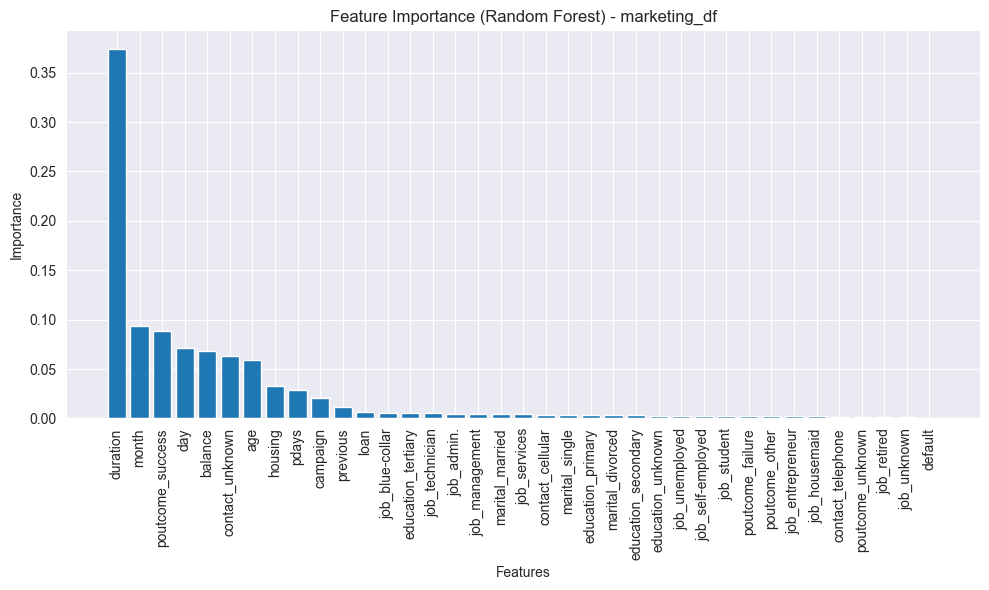

Feature importance for marketing_df (permutation_importance):
duration: 0.2068
month: 0.0716
contact_unknown: 0.0347
poutcome_success: 0.0278
day: 0.0264
housing: 0.0135
age: 0.0085
pdays: 0.0057
balance: 0.0019
loan: 0.0015
education_primary: 0.0012
previous: 0.0006
job_self-employed: 0.0004
poutcome_failure: 0.0004
job_technician: 0.0003
education_unknown: 0.0003
poutcome_unknown: 0.0001
marital_divorced: 0.0001
job_management: 0.0000
job_services: 0.0000
job_unknown: 0.0000
job_retired: 0.0000
job_entrepreneur: -0.0000
campaign: -0.0000
job_housemaid: -0.0000
job_student: -0.0001
poutcome_other: -0.0003
default: -0.0004
marital_single: -0.0004
contact_telephone: -0.0005
job_blue-collar: -0.0005
job_admin.: -0.0006
job_unemployed: -0.0006
education_secondary: -0.0007
contact_cellular: -0.0008
education_tertiary: -0.0011
marital_married: -0.0015


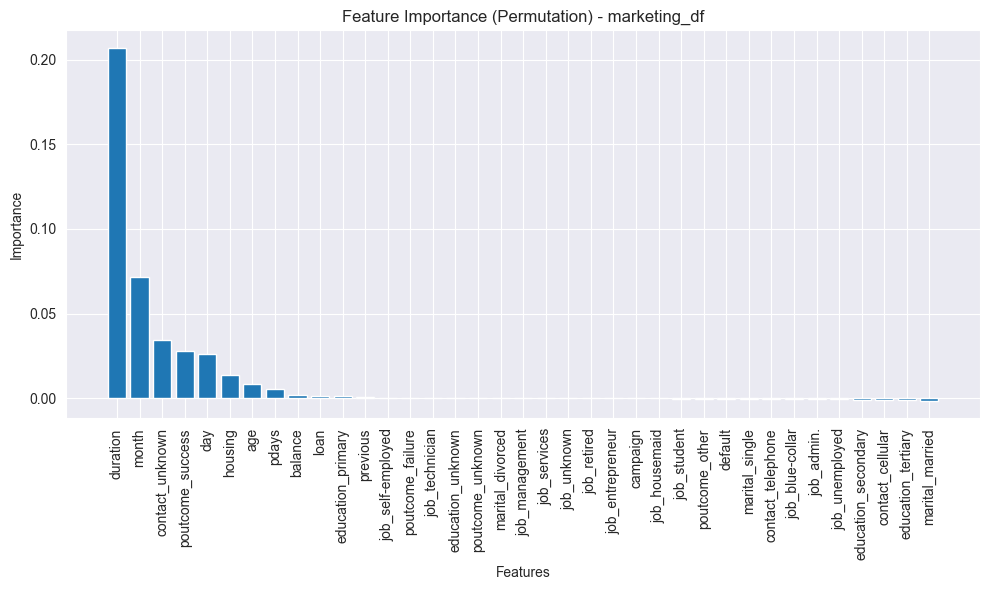

In [16]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_m)), feature_importances_m[feature_indices_m])
plt.xticks(range(len(feature_importances_m)), [feature_names_m[i] for i in feature_indices_m], rotation=90)
plt.title("Feature Importance (Random Forest) - marketing_df")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Анализ важности признаков через permutation_importance
result_m = permutation_importance(best_model_m, X_test_m, y_test_m, n_repeats=10, random_state=42)
importances_m = result_m.importances_mean
feature_indices_perm_m = np.argsort(importances_m)[::-1]

print("Feature importance for marketing_df (permutation_importance):")
for idx in feature_indices_perm_m:
    print(f"{feature_names_m[idx]}: {importances_m[idx]:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_m)), importances_m[feature_indices_perm_m])
plt.xticks(range(len(importances_m)), [feature_names_m[i] for i in feature_indices_perm_m], rotation=90)
plt.title("Feature Importance (Permutation) - marketing_df")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Personal_df

In [17]:
X_p = personal_df.drop(columns=['Personal Loan'])
y_p = personal_df['Personal Loan'] 

In [18]:
feature_names_p = X_p.columns.tolist()

In [19]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)


In [30]:
def objective_p(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1500, 25)
    max_depth = trial.suggest_int('max_depth', 2, 20, 2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model_p = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    score = cross_val_score(model_p, X_train_p, y_train_p, cv=5, scoring='accuracy').mean()
    return score

In [31]:
%%time
study_p = optuna.create_study(direction='maximize')
study_p.optimize(objective_p, n_trials=50)

[I 2024-12-02 22:44:48,787] A new study created in memory with name: no-name-645e58e2-8729-465b-aa53-2f937b7a254a
C:\Users\mitay\AppData\Local\Temp\ipykernel_2468\2360418156.py:2: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 50, 1500, 25)
C:\Users\mitay\AppData\Local\Temp\ipykernel_2468\2360418156.py:3: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 2, 20, 2)
[I 2024-12-02 22:45:06,293] Trial 0 finished with value: 0.98275 and parameters: {'n_estimators': 1150, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.98275.
C:\Users\mitay\AppData\Local\Temp\ipykernel_2468\2360418156.py:2: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to 

CPU times: total: 9min 45s
Wall time: 9min 59s


In [32]:
print("Best hyperparameters for personal_df:", study_p.best_params)

Best hyperparameters for personal_df: {'n_estimators': 550, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [33]:
best_model_p = RandomForestClassifier(
    n_estimators=study_p.best_params['n_estimators'],
    max_depth=study_p.best_params['max_depth'],
    min_samples_split=study_p.best_params['min_samples_split'],
    min_samples_leaf=study_p.best_params['min_samples_leaf'],
    max_features=study_p.best_params['max_features'],
    random_state=42
)

In [34]:
%%time
best_model_p.fit(X_train_p, y_train_p)

CPU times: total: 1.73 s
Wall time: 1.74 s


RandomForestClassifier(max_depth=18, min_samples_split=3, n_estimators=550,
                       random_state=42)

In [35]:
test_score_p = best_model_p.score(X_test_p, y_test_p)
print(f"Test accuracy for personal_df: {test_score_p:.4f}")

Test accuracy for personal_df: 0.9890


In [36]:
# Анализ важности признаков через feature_importances_
feature_importances_p = best_model_p.feature_importances_
feature_indices_p = np.argsort(feature_importances_p)[::-1]
print("Feature importance for personal_df (feature_importances_):")
for idx in feature_indices_p:
    print(f"{feature_names_p[idx]}: {feature_importances_p[idx]:.4f}")

Feature importance for personal_df (feature_importances_):
Income: 0.3296
Education: 0.1907
CCAvg: 0.1575
Family: 0.1128
CD Account: 0.0508
Mortgage: 0.0370
Age: 0.0358
Experience: 0.0344
ZIP Code: 0.0330
CreditCard: 0.0082
Online: 0.0064
Securities Account: 0.0039


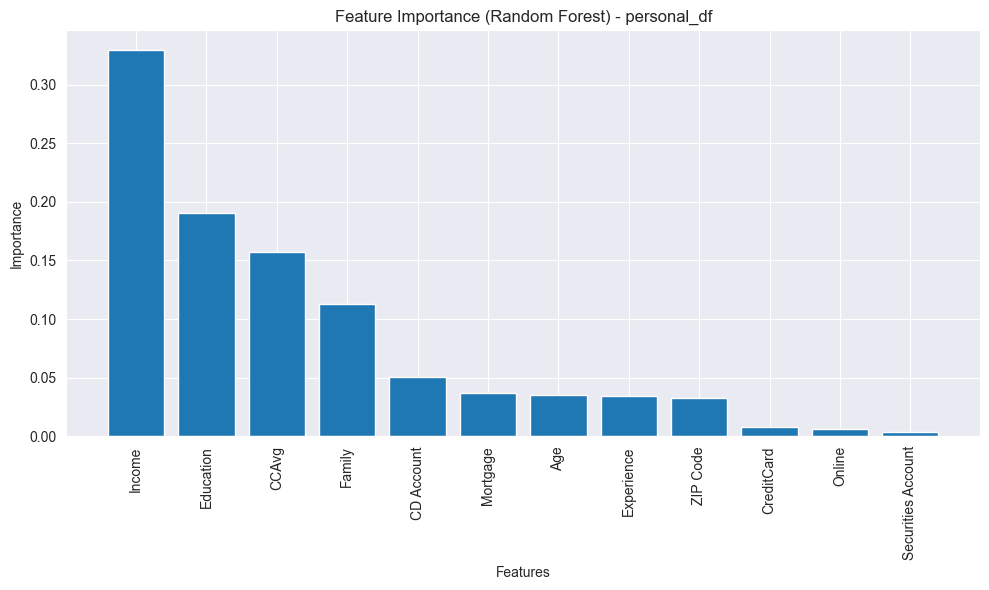

Feature importance for personal_df (permutation_importance):
Income: 0.1824
Education: 0.0769
Family: 0.0526
CCAvg: 0.0122
CD Account: 0.0032
Mortgage: -0.0001
Securities Account: -0.0002
ZIP Code: -0.0003
Experience: -0.0004
Age: -0.0007
CreditCard: -0.0009
Online: -0.0010


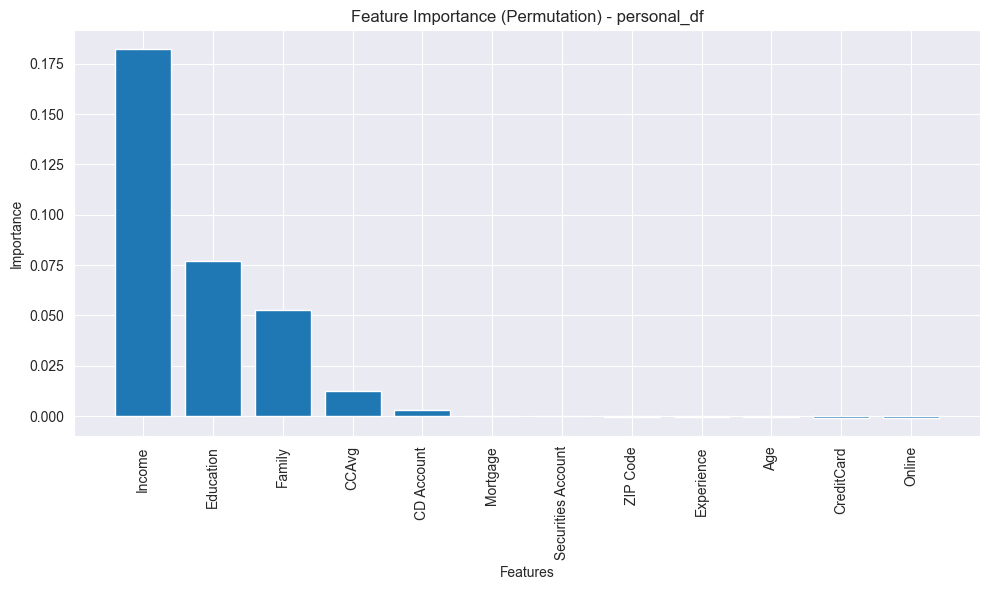

In [37]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_p)), feature_importances_p[feature_indices_p])
plt.xticks(range(len(feature_importances_p)), [feature_names_p[i] for i in feature_indices_p], rotation=90)
plt.title("Feature Importance (Random Forest) - personal_df")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Анализ важности признаков через permutation_importance
result_p = permutation_importance(best_model_p, X_test_p, y_test_p, n_repeats=10, random_state=42)
importances_p = result_p.importances_mean
feature_indices_perm_p = np.argsort(importances_p)[::-1]

print("Feature importance for personal_df (permutation_importance):")
for idx in feature_indices_perm_p:
    print(f"{feature_names_p[idx]}: {importances_p[idx]:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_p)), importances_p[feature_indices_perm_p])
plt.xticks(range(len(importances_p)), [feature_names_p[i] for i in feature_indices_perm_p], rotation=90)
plt.title("Feature Importance (Permutation) - personal_df")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()